<a href="https://colab.research.google.com/github/Shrinithi04/Time-Series-Data-cleaning-loading-and-preprocessing-/blob/main/TSA_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:


np.random.seed(42)
time_index = pd.date_range(start="2023-01-01", periods=15, freq='D')

data = {
    "Temperature": np.linspace(25, 35, 15) + np.random.normal(0, 1, 15),
    "Humidity": np.linspace(60, 80, 15) + np.random.normal(0, 2, 15),
    "Pressure": np.linspace(1000, 1015, 15) + np.random.normal(0, 0.5, 15)
}

df = pd.DataFrame(data, index=time_index)

In [ ]:
def adf_test(series):
    result = adfuller(series)
    return result[1]

stationary_df = df.copy()

for col in df.columns:
    p_value = adf_test(df[col])
    if p_value > 0.05:
        stationary_df[col] = df[col].diff().dropna()


In [ ]:
stationary_means = stationary_df.mean()
stationary_vars = stationary_df.var()
stationary_constants = stationary_df.iloc[0]


print("Mean of stationary data:\n", stationary_means)
print("\nVariance of stationary data:\n", stationary_vars)
print("\nConstant (approximate first value):\n", stationary_constants)


Mean of stationary data:
 Temperature    30.010349
Humidity        1.467228
Pressure        1.040114
dtype: float64

Variance of stationary data:
 Temperature    7.379338
Humidity       7.181525
Pressure       0.573819
dtype: float64

Constant (approximate first value):
 Temperature    25.496714
Humidity             NaN
Pressure             NaN
Name: 2023-01-01 00:00:00, dtype: float64


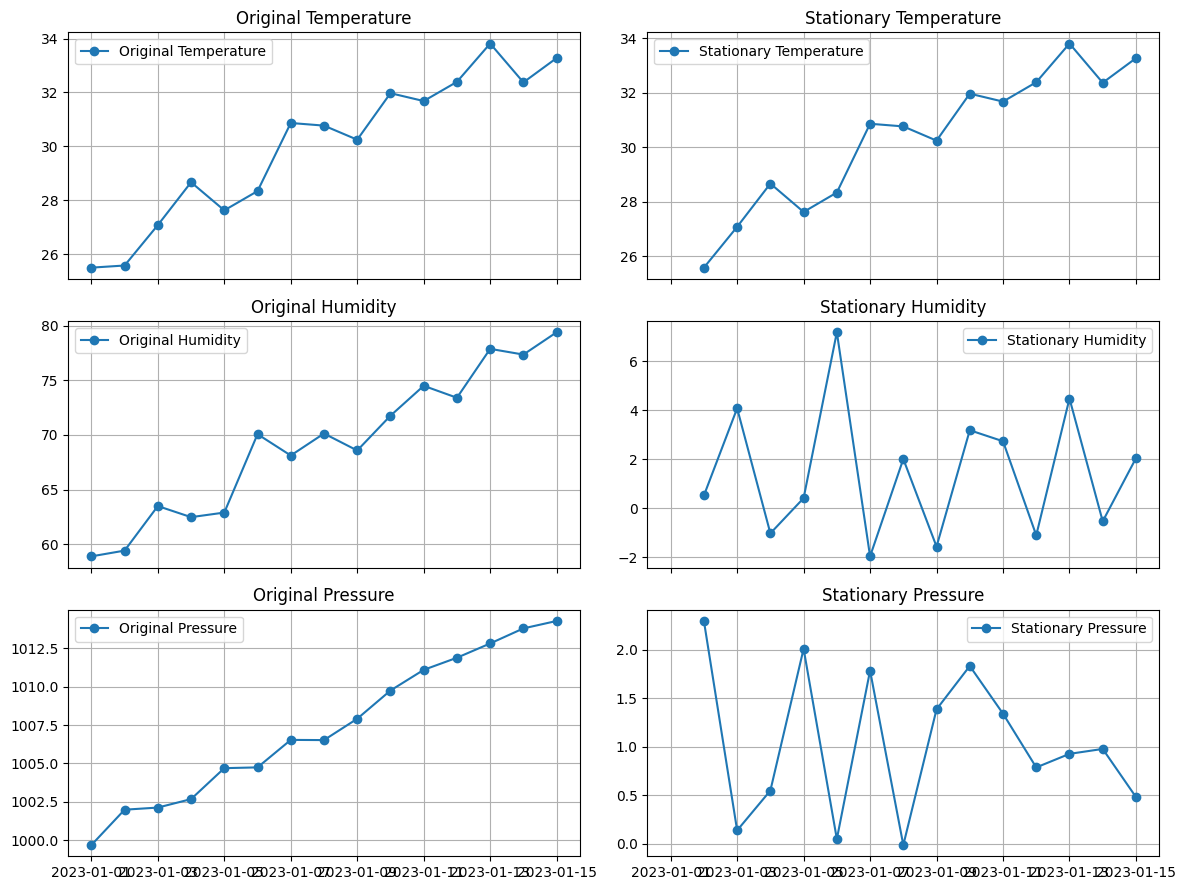

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9), sharex=True)

for i, col in enumerate(df.columns):
    # Original series
    axes[i, 0].plot(df.index, df[col], marker='o', linestyle='-', label=f'Original {col}')
    axes[i, 0].set_title(f'Original {col}')
    axes[i, 0].legend()
    axes[i, 0].grid()

    # Stationary series
    axes[i, 1].plot(stationary_df.index[1:], stationary_df[col][1:], marker='o', linestyle='-', label=f'Stationary {col}')
    axes[i, 1].set_title(f'Stationary {col}')
    axes[i, 1].legend()
    axes[i, 1].grid()

plt.tight_layout()
plt.show()

In [ ]:
print("Original Data:\n", df)

# Print stationary dataset
print("\nStationary Data:\n", stationary_df)

Original Data:
             Temperature   Humidity     Pressure
2023-01-01    25.496714  58.875425   999.699147
2023-01-02    25.576021  59.402909  1001.997568
2023-01-03    27.076260  63.485638  1002.136109
2023-01-04    28.665887  62.469666  1002.685430
2023-01-05    27.622989  62.889678  1004.696987
2023-01-06    28.337292  70.074155  1004.746721
2023-01-07    30.864927  68.119876  1006.533003
2023-01-08    30.767435  70.135056  1006.520165
2023-01-09    30.244811  68.579075  1007.907336
2023-01-10    31.971131  71.768377  1009.741288
2023-01-11    31.679439  74.507559  1011.083519
2023-01-12    32.391413  73.412299  1011.871398
2023-01-13    33.813391  77.894253  1012.799319
2023-01-14    32.372434  77.370151  1013.778020
2023-01-15    33.275082  79.416613  1014.260739

Stationary Data:
             Temperature  Humidity  Pressure
2023-01-01    25.496714       NaN       NaN
2023-01-02    25.576021  0.527484  2.298421
2023-01-03    27.076260  4.082728  0.138541
2023-01-04    28.6658